In [7]:
'''This notebook models the percent length estimation error
under rotation'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns

from dblib import mssql

sns.set()

#gey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
#grey = ["#FFFFFF", "#111111"]
#sns.set_palette(sns.color_palette("cubehelix", 8))

sns.set(font="Times New Roman", font_scale=1.1)
sns.set_style('ticks', rc={'axes.grid':True})
#sns.despine()

def cm2inch(*tupl):
    '''(tuple) -> tuple
    matplotlib uses inches for figsize,
    this wll convert inches to cm

    Example:
    >>>plt.figure(figsize=cm2inch(12.8, 9.6))
    '''
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [2]:
sql = "" \
"select sample_lengthid ,cnn as CNN ,status" \
",case when transform='hflip' then 'horizontal flip' else 'none' end as transform ,accuracy as Score ,IoU" \
" from  v_mv_long_form" \
" where not accuracy is null and status='Success' and (transform='None' or transform='hflip')"


with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['sample_lengthid', 'CNN', 'status', 'transform', 'Score', 'IoU']

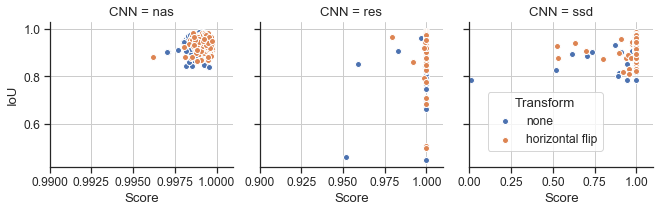

In [17]:
inch = 2.54
h = 8 / inch
g = sns.FacetGrid(df, col="CNN",  hue="transform", sharex=False, sharey=True, height=h, aspect=1, hue_kws=dict(marker=["o", "o"]) )
g = (g.map(plt.scatter, "Score", "IoU", edgecolor="w"))

ax_nas = g.facet_axis(0,0); ax_res = g.facet_axis(0,1); ax_ssd = g.facet_axis(0,2)

ax_nas.set_xlim(0.99, 1.001)
ax_res.set_xlim(0.90, 1.01)
ax_ssd.set_xlim(0, 1.1)
plt.legend(loc=(0.1,0.115), title='Transform')
#ax_nas.set_ylim(0.4, 1.0)
#ax_res.set_xlim(0.95, 1.0)
#ax_ssd.set_xlim(0, 1.0)
plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/iou_vs_accuracy.jpg', dpi=500)